<a href="https://colab.research.google.com/github/rayner-p/Simulacion/blob/main/simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<div align='center'>**Universidad Politécnica Salesiana**
##<div align='center'>Alumno: *Rayner Palta*

##<div align='center'>Materia: *Simulación.*
##<div align='center'>Proyecto Interciclo.


---


###Investigue, diseñe y desarrolle e implemente  un modelo de simulación dentro de un software y/o lenguaje de simulación que usted(s) escoja.

##Solo se va a tener en cuanta uno de los recintos electorales (investigar datos de cuantas personas asisten a votar).

#Datos:


---


###Provincia escogida: **El Oro**
###Cantón: **Pasaje**
###Parroquia: **Ochoa León**
###Recinto: **Colegio Nacional Técnico Ing. José Corsino Cárdenas**


---
###Sufragantes: *40717*
###Ausentismos: *8954*
###Blancos: *901*
###Nulos: *4305*


---
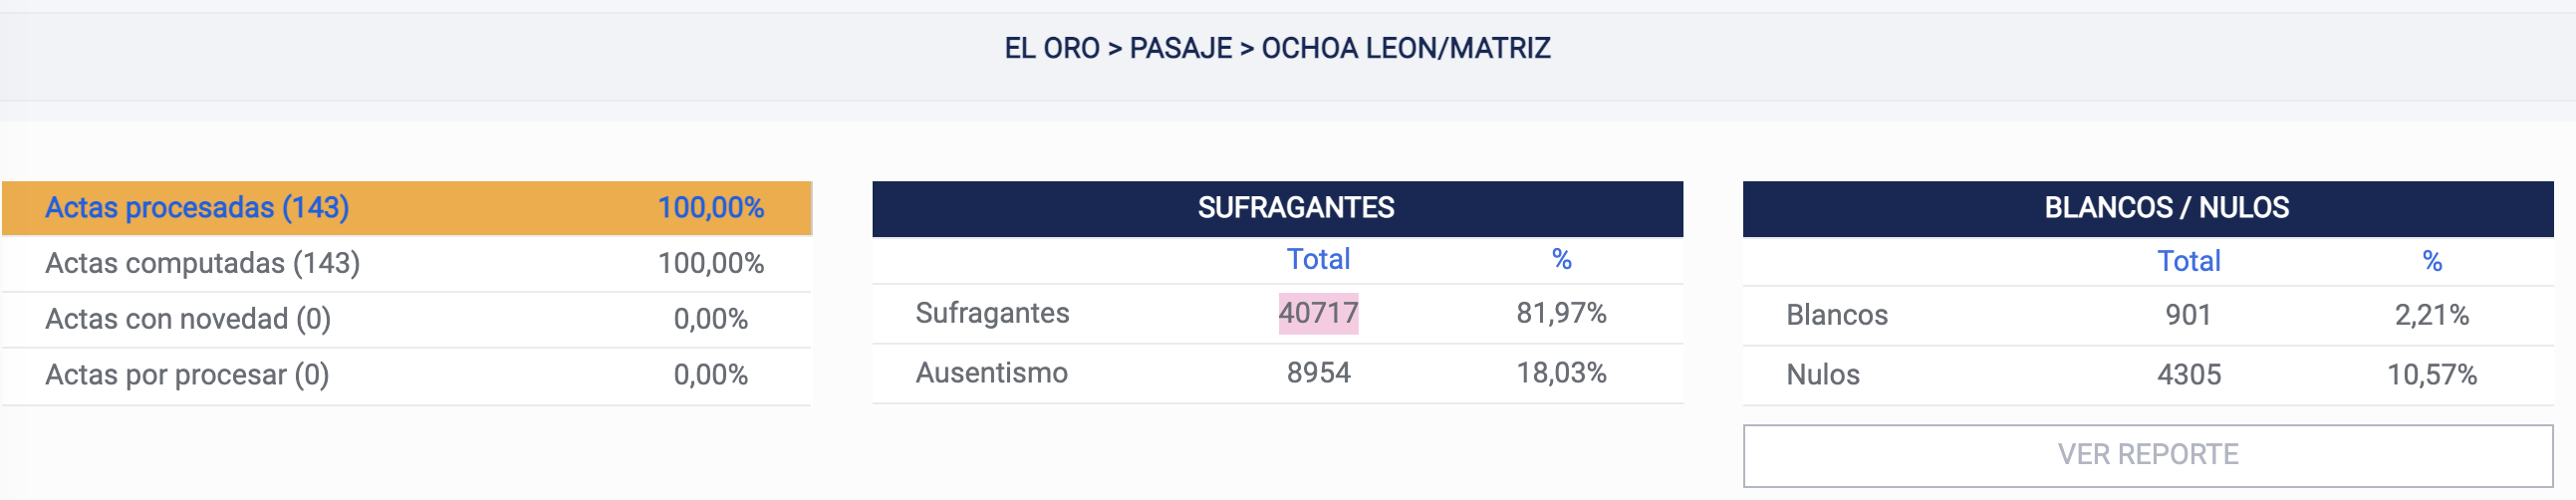



###Tomar los resultados de la regresión para la vacuna según la llegada

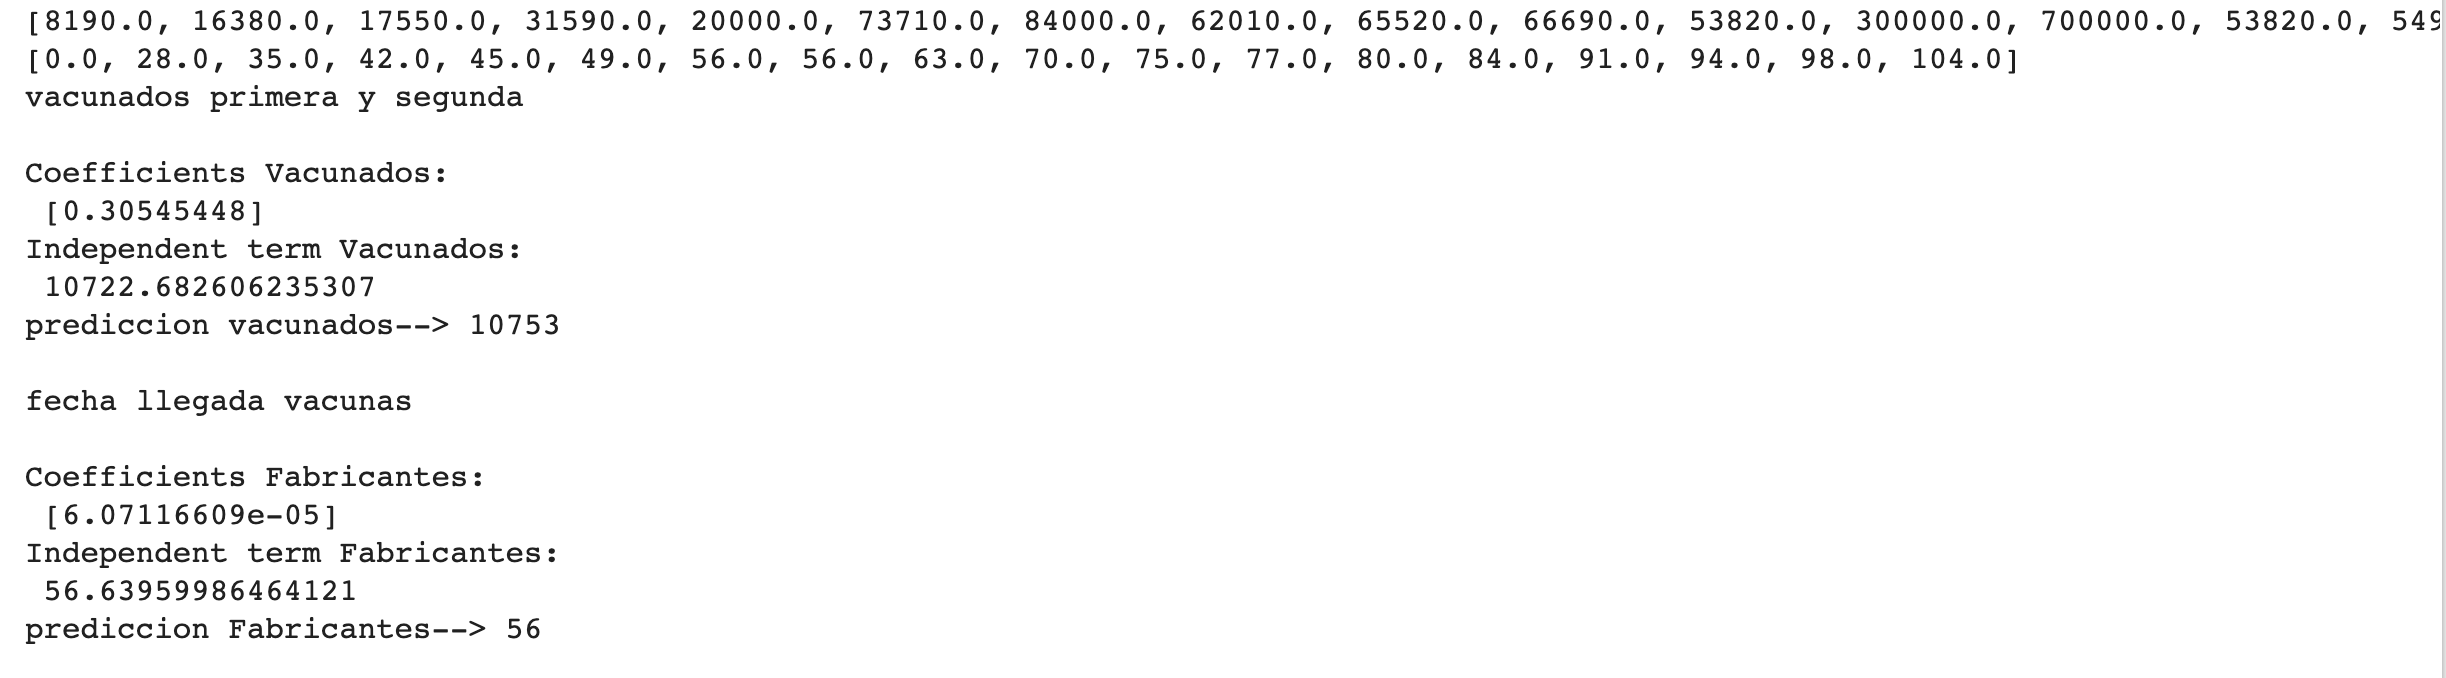

#Condiciones a tener en cuenta:


###Se tiene una promedio que el 80% de personas realizaran el proceso de vacunación dentro del Ecuador

###Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse.

###Las personas solo tiene un recinto electoral para realizar el proceso.

###Las personas realizan la primera vacuna y 30 días después la segunda vacuna. 

###La persona se acerca a la mesa  y hacen fila en caso de ser necesario para recibir la vacuna. 

###Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos. 

###Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud. 

###La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos. 

###La persona sale del recinto electoral. 

###Regresan para la próxima fecha y se repite el ciclo

In [43]:
pip install simpy

In [1]:
import simpy 
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sufragantes=40717
ausentismos= 8954
blancos=901
nulos=4305
 
total_votantes= (sufragantes+ausentismos)
print(total_votantes)

49671


In [3]:
personas_no_vacunada = int((total_votantes*rd.randint(5,10))/100)
print('no vacu', personas_no_vacunada)

no vacu 2980


In [4]:
# Maximo de vacunas
vacunas_prediccion = 10753

# Total de numero de puntos de vacunacion
juntas_vacunacion = 3

pacientes = total_votantes

# Intervalo de tiempo en que llegan los pacientes
tiempo_llegada_paciente_vacunarse=  rd.randint(5,10)

#tiempo espera en el recinto
tiempo_espera_recinto=20

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}

#Diccionarios para almacenar la primera y segunda dosis
primera_dosis ={}
segunda_dosis = {}

#Diccionario para el numero de pacientes que no han sido atendidos
sin_vacunar = []

#Numero de vacunas aplicadas
vacunas_aplicadas = 0

#Fecha inicial 30 dias, y se suma 1 dia.
tiempo_espera_vacuna =30

#Horario_atncion
horarioInicio=8
horarioFin=17
horario_total_atencion = horarioFin-horarioInicio

# Tiempo de simulación
timempo = 60*horario_total_atencion

#tiempo entrega certificado
tiempo_certificado = rd.randint(2,3)



In [18]:
class procesoVacunacion(object):
  def __init__(self, environment, juntas, lugar):
    self.env=environment
    self.lugarVacunacion = simpy.Resource(environment, juntas)
    self.lugar = lugar
  
    #espera 30 dias para la segunda dosis
  def analisisPrevio(self, paciente, tamanioVacuna , total_pacientes_analizar):
    print('ENTRO?')
    #tr=tiempo_espera_paciente2(tiempo_espera_recinto)
    estado_paciente = rd.randint(0,1)
    print('estado pacient', estado_paciente)
    print(paciente,'hac la espera de 20 min' )
    if tamanioVacuna<=total_pacientes_analizar and estado_paciente==1:
      sin_vacunar.append(paciente)  
    return estado_paciente
    #yield self.env.timeout(tm)
    print(estado_paciente)
  #def tiempo_espera_paciente2(self, tiempo_espera_recinto):
  #  yield self.env.timeout(tiempo_espera_recinto)
    #Para traslado a la cama/silla de vacunacion y se inyecta
  def primera(self, paciente, estado_paciente):
    if estado_paciente == 0:
      tm = tiempo_llegada_paciente_vacunarse
      yield self.env.timeout(tm)
      print( paciente,' ','Vacunado con la primera dosis a las -->',' ',str(env.now))
      print('Segunda dosis en 30 dás')
      primera_dosis[paciente] = tm        
    else:
      print(paciente,'ha sido diagnosticado positivo para COVID. Vacuna no posible')
  
  #def tiempo_espera(self, tiempo_espera_vacuna):
    #espera 30 dias para la segunda dosis
  #  yield self.env.timeout(tiempo_espera_vacuna)
  
  def segunda(self, paciente, estado_paciente):
    #espera = tiempo_espera(tiempo_espera_vacuna)
    if estado_paciente ==0:
      tm2 = tiempo_llegada_paciente_vacunarse
      yield self.env.timeout(tm2)
      print(paciente, 'Ha recibido su segunda dosis a las:',' ',str(env.now))
      segunda_dosis[paciente] = tm2
    else:
      print(paciente, 'ha presentado algun incoveniente por lo que no se ha podido vacunarlo', 'sale a las -->',' ', str(env.now))
  def generar_certificado(self,paciente):
    tm3 = tiempo_certificado     
    yield self.env.timeout(tm3)
    print(paciente,'->', 'adquirio su certificado a las ',' ', str(env.now),' ','minutos')

def proceso_paciente(env, paciente,punto,tamanioVacuna, total_pacientes_analizar):
  print(' Llega', (paciente,str(env.now)))
  with punto.lugarVacunacion.request() as ll:
    yield ll
    #total_pacientes_analizar = int(pacientes/100*personas_no_vacunada)
    print('A ser vacuando ', (paciente,' ','hora de inicio','->',str(env.now)))
    analisis_sintomas = punto.analisisPrevio(paciente, tamanioVacuna,total_pacientes_analizar )

    if analisis_sintomas == 0:
      yield env.process(punto.primera(paciente, analisis_sintomas))
      print('Vacunando al  ', (paciente,' ','hora de vacunacion ->',' ',str(env.now)))
      yield env.process(punto.generar_certificado(paciente))
      print('Vacunacion trminada al ->  ', (paciente, 'hora ->',' ',str(env.now),' ', 'Entrega de fecha para la segunda vacuna '))
    if analisis_sintomas == 0:
      yield env.process(punto.segunda(paciente, analisis_sintomas))
      print('Vacunacion segunda dosis al ->', (paciente,'hora del procesos',' ',str(env.now)))
        
def principal(env,juntas, pacientes, tiempo):
  #ejecutamos la clase
  lugar = procesoVacunacion(env,juntas,'Corsino Cardenas')
   
  no_vacunadas = personas_no_vacunada
  print('Personas no vacunadas: ',no_vacunadas)

  personas_Covicho = int(pacientes/100*no_vacunadas)
  print('Numero personas con sintomas de covicho --> ',personas_Covicho)
    
  no_vacunados = len(sin_vacunar)
  print('tamanio personas sin vacunar -->', no_vacunados)
  for total in range(pacientes):
    env.process(proceso_paciente(env,'Paciente %d'%(total+1),lugar,no_vacunados,personas_Covicho))
  while True:
    yield env.timeout(rd.randint(tiempo-2,tiempo+2))
    total+=1
    env.process(proceso_paciente(env,'Paciente %d'%(total+1),lugar,no_vacunados,personas_Covicho))
        


In [19]:
print("Punto de vacunacion")
env=simpy.Environment()
print("Total de pacientes => ", pacientes)
#env.process(procesoVacunacion.analisisPrevio(env,pacientes, sin_vacunar , int(pacientes/100*personas_no_vacunada)))
env.process(principal(env, juntas_vacunacion,pacientes,tiempo_llegada_paciente_vacunarse))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = timempo)

Streaming output truncated to the last 5000 lines.
 Llega ('Paciente 46312', '0')
 Llega ('Paciente 46313', '0')
 Llega ('Paciente 46314', '0')
 Llega ('Paciente 46315', '0')
 Llega ('Paciente 46316', '0')
 Llega ('Paciente 46317', '0')
 Llega ('Paciente 46318', '0')
 Llega ('Paciente 46319', '0')
 Llega ('Paciente 46320', '0')
 Llega ('Paciente 46321', '0')
 Llega ('Paciente 46322', '0')
 Llega ('Paciente 46323', '0')
 Llega ('Paciente 46324', '0')
 Llega ('Paciente 46325', '0')
 Llega ('Paciente 46326', '0')
 Llega ('Paciente 46327', '0')
 Llega ('Paciente 46328', '0')
 Llega ('Paciente 46329', '0')
 Llega ('Paciente 46330', '0')
 Llega ('Paciente 46331', '0')
 Llega ('Paciente 46332', '0')
 Llega ('Paciente 46333', '0')
 Llega ('Paciente 46334', '0')
 Llega ('Paciente 46335', '0')
 Llega ('Paciente 46336', '0')
 Llega ('Paciente 46337', '0')
 Llega ('Paciente 46338', '0')
 Llega ('Paciente 46339', '0')
 Llega ('Paciente 46340', '0')
 Llega ('Paciente 46341', '0')
 Llega ('Paciente 4

#Referencias
###https://almacenamiento.msp.gob.ec/index.php/s/YfuIYkVi3QZQnr2#pdfviewer
###https://machalamovil.com/31-recintos-electorales-de-el-oro-seran-habilitados-para-plan-de-vacunacion-contra-covid-19/
###https://resultados.cne.gob.ec/
###https://www.salud.gob.ec/wp-content/uploads/2021/03/PUNTOS-DE-VACUNACION-FASE-0-ATENDIDOS-HASTA-04-03-2021.pdf
